<h1>Ristiintaulukointi</h1>

Kahden kategorisen muuttujan riippuvuuden tarkasteluun

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Listat muuttujien tekstimuotoisista arvoista
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
sukup = ['Mies', 'Nainen']

In [4]:
# Ristiintaulukointi lukumäärinä
df1 = pd.crosstab(df['koulutus'], df['sukup'])

# Otsikot kuntoon edellä määriteltyjä listoja käyttäen
df1.index = koulutus
df1.columns = sukup

df1

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


In [5]:
# Ristiintaulukointi; prosentit (normalize) sarakkeiden kokonaissummista
df2 = pd.crosstab(df['koulutus'], df['sukup'], normalize = 'columns')

# Riviotsikot koulutus-listasta
df2.index = koulutus

# Kikkailen n-arvot sarakeotsikoihin
miehet = df['koulutus'][df['sukup']==1].count()
naiset = df['koulutus'][df['sukup']==2].count()
df2.columns = ['Mies, n=' + str(miehet), 'Nainen, n=' + str(naiset)]

# Prosenttilukujen ulkoasun viimeistely
(df2*100).style.format('{:.1f} %')

,"Mies, n=62","Nainen, n=19"
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %')]

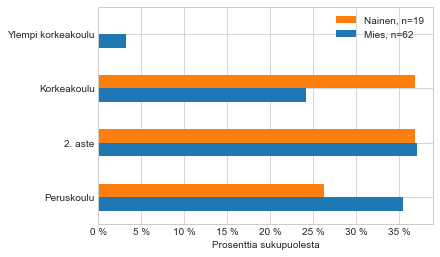

In [6]:
# Edellinen pylväinä; legend='reverse' kääntää selitteen järjestyksen
ax1 = df2.plot.barh(legend='reverse')

# x-akselin otsikko
ax1.set_xlabel('Prosenttia sukupuolesta')

# x-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax1.get_xticks()])

[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

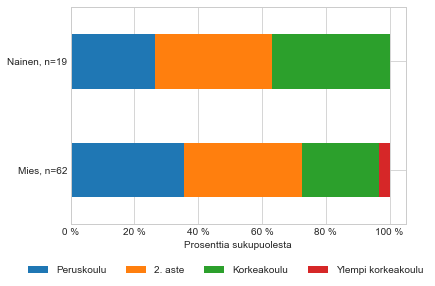

In [7]:
# Edellinen 100 % pinottuina vaakapylväinä
# T vaihtaa taulukon rivit ja sarakkeet (kaavion arvosarjat ja kategoriat) päittäin
ax2 = df2.T.plot.barh(stacked = True)

# x-akselin otsikko
ax2.set_xlabel('Prosenttia sukupuolesta')

# Selitteen sijoittelu suhteessa origoon, selitteitä 4 vierekkäin
ax2.legend(loc=(-0.14, -0.25), ncol=4)
 
# x-akselin prosenttilukujen ulkoasun viimeistely
ax2.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax2.get_xticks()])

<h2>Onko ristiintaulukoinnissa havaittu riippuvuus tilastollisesti merkitsevää?</h2>

Otoksessa havaitut riippuvuudet voivat olla liian pieniä, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama riippuvuus.

Riippuvuutta sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Riippuvuuden merkitsevyyttä voit testata laskemalla niin kutsuttu <b>p-arvo</b>. Mitä pienempi p-arvo, sitä merkitsevämpi riippuvuus. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä riippuvuudesta.

Ristiintaulukointiin liittyvän p-arvon voit laskea khiin neliö -testillä (chi2_contingency).

In [8]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['koulutus'], df['sukup']))

(1.836533415650563, 0.6070173075042058, 3, array([[20.66666667,  6.33333333],
        [22.96296296,  7.03703704],
        [16.83950617,  5.16049383],
        [ 1.5308642 ,  0.4691358 ]]))

Khiin neliö -testin tulos: Riippuvuus ei ole merkitsevää (khiin neliö 1.84, p=0.607, df=3).

Tulosteessa näkyvillä myös odotetut frekvenssit (laskennalliset frekvenssit hypoteettisessa tilanteessa, jossa ei ole lainkaan riippuvuutta).

<h2>Lisätietoa merkitsevyystestauksesta</h2>

Tietoa khiin neliö -testistä:
https://tilastoapu.wordpress.com/2011/10/14/6-ristiintaulukointi-ja-khiin-nelio-testi/

Lisätietoa p-arvoista:
https://tilastoapu.wordpress.com/2012/02/14/p-arvo/

p-arvoja Pythonilla eri testaustilanteisiin:
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/p.ipynb